In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# the .explode function turns lists into index rows 
# we want to see the most prominent skills requirement for each job roles

In [4]:
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"[excel, powerpoint, power bi]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [5]:
job_explode = df.explode(['job_skills'])

In [6]:
job_explode[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,Data Engineer,kafka
785739,Data Engineer,kubernetes
785739,Data Engineer,docker
785740,Software Engineer,aws


In [7]:
job_explode['job_skills'].value_counts()

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
rubyon rails         1
visualbasic          1
msaccess             1
dingtalk             1
rocketchat           1
Name: count, Length: 252, dtype: int64

In [15]:
job_explode = job_explode.groupby(['job_title_short', 'job_skills']).size()

In [20]:
# convert job_explode from series as it is now to a data frame.

df_job_exploded = job_explode.reset_index(name= 'skills_count').sort_values(by= 'skills_count', ascending= False)

In [ ]:
df_job_exploded

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [ ]:
job_title = 'Data Analyst'  # defining variables
top_skills = 10

The_job_skill = df_job_exploded[df_job_exploded['job_title_short'] == job_title].head(top_skills)

<function matplotlib.pyplot.show(close=None, block=None)>

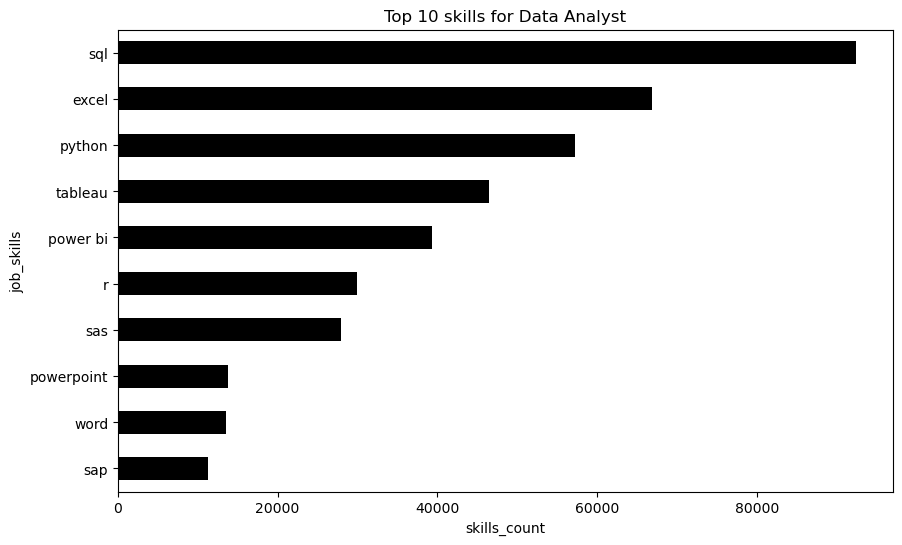

In [68]:
The_job_skill.plot(kind= 'barh', x= 'job_skills' , y= 'skills_count', color = 'black', figsize= (10,6))
plt.gca().invert_yaxis()  # to show from largest to smallest
plt.xlabel('skills_count')
plt.legend().set_visible(False)
plt.title(f'Top {top_skills} skills for {job_title}')
plt.show

In [58]:
The_job_skill

,job_title_short,job_skills,skills_count
